<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CSAI School</h2>
<h2 align="center">Machine Learning - Spring 2024</h2>
<h2 align="center"> SVM - Kernels </h2>

## Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


## Loading the data


In [24]:
df = pd.read_csv('pulsar_data_train.csv')

X = df.iloc[:, :7]
y = df.iloc[:, 8]


In [27]:
X

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008
...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395


In [32]:
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=42)

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


KeyError: "None of [Int64Index([ 7488,  3776,  6243,  6123,  4714,  6671,  5847, 10413,  4149,\n            10523,\n            ...\n             4426,   466,  6265,  5734, 11284, 11964,  5191,  5390,   860,\n             7270],\n           dtype='int64', length=12528)] are in the [columns]"

## Training a classifier


In [ ]:
svm = SVC(C=100000, kernel='linear')
svm.fit(X_train, y_train)

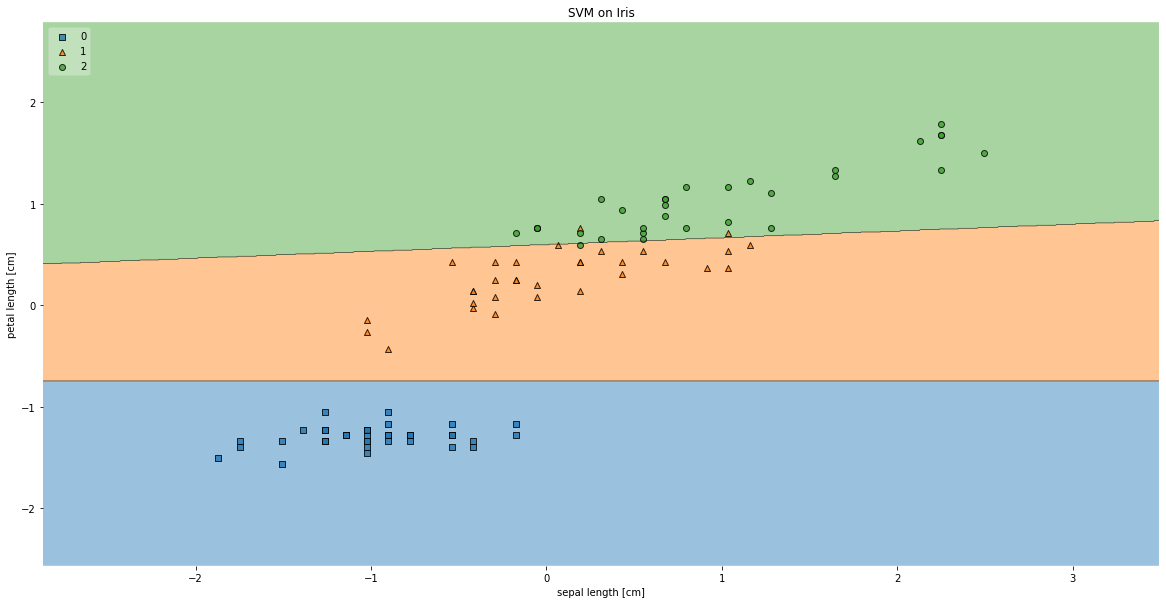

In [ ]:

# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

## Trying different combinations:

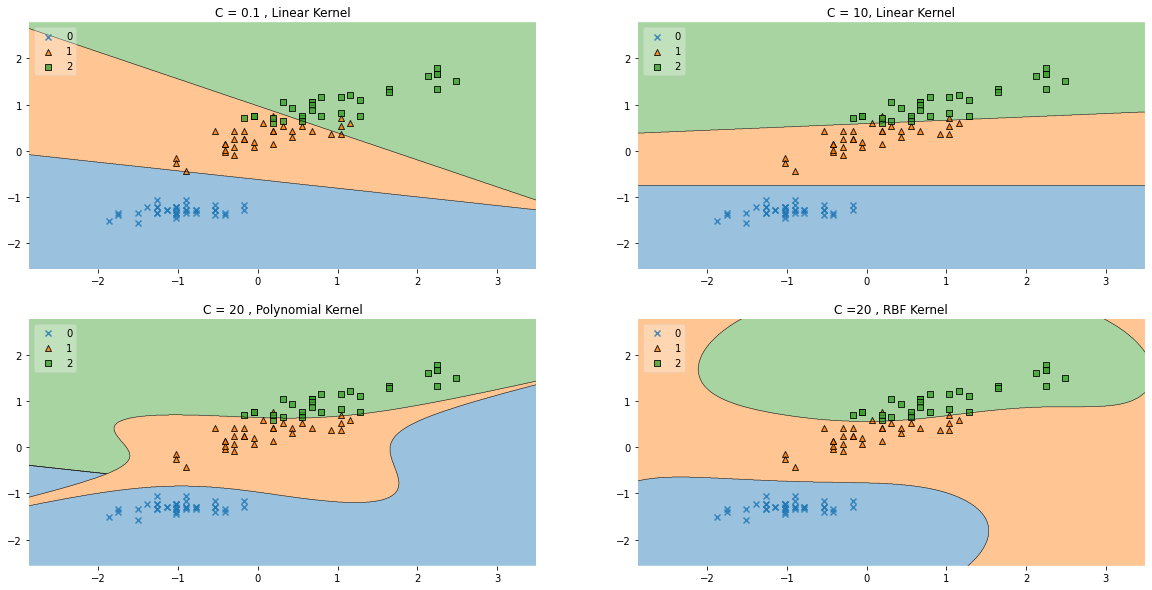

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

# CODE: SVM with a non-linear Dataset

We are going to work with a synthatic dataset composed of the XOR gate

<img src = https://www.bogotobogo.com/python/scikit-learn/images/svm2/XOR-GATE.png>

## Generate the dataset

In [ ]:
np.random.seed(0) ## to reproduce the results
X_xor = np.random.randn(500, 2) ## Generate 500 random floating-point numbers
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:,1] > 0) ## Output
y_xor = np.where(y_xor, 0 , 1)

In [ ]:
len(X_xor)

500

## Split the dataset


In [ ]:
X_xor, y_xor = shuffle_arrays_unison(arrays=[X_xor, y_xor], random_seed=42)

X_train, y_train = X_xor[:400], y_xor[:400]
X_test, y_test = X_xor[400:], y_xor[400:]

## Train Different Kernels

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

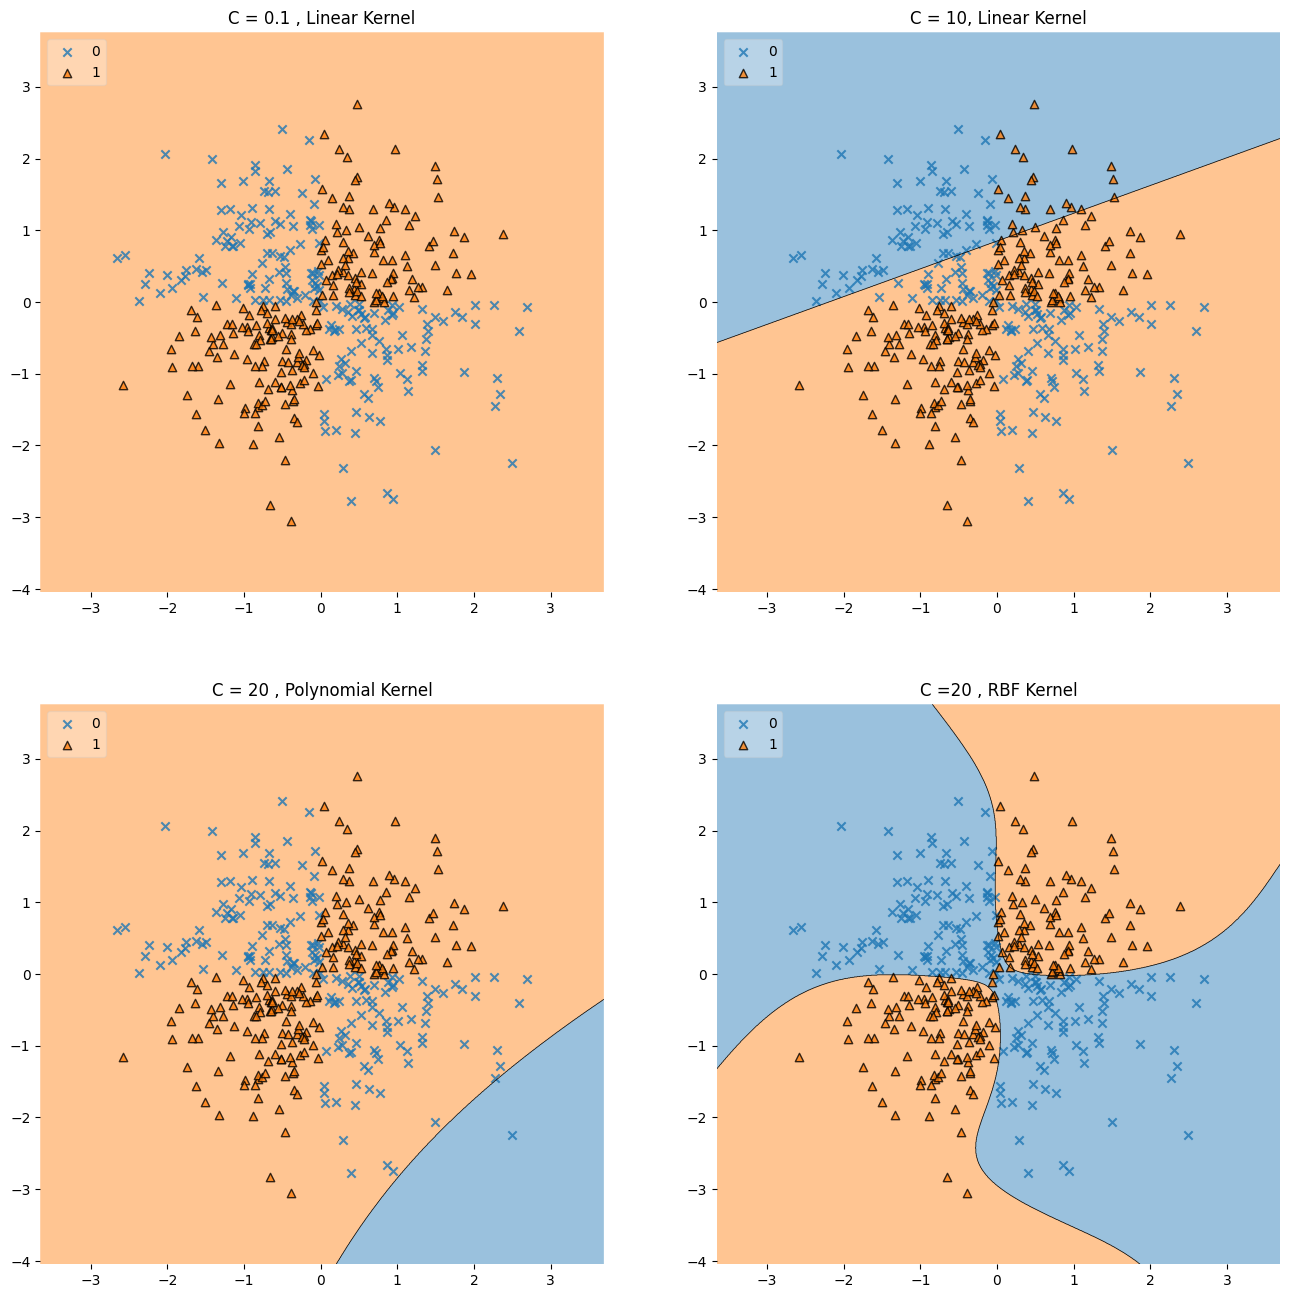

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

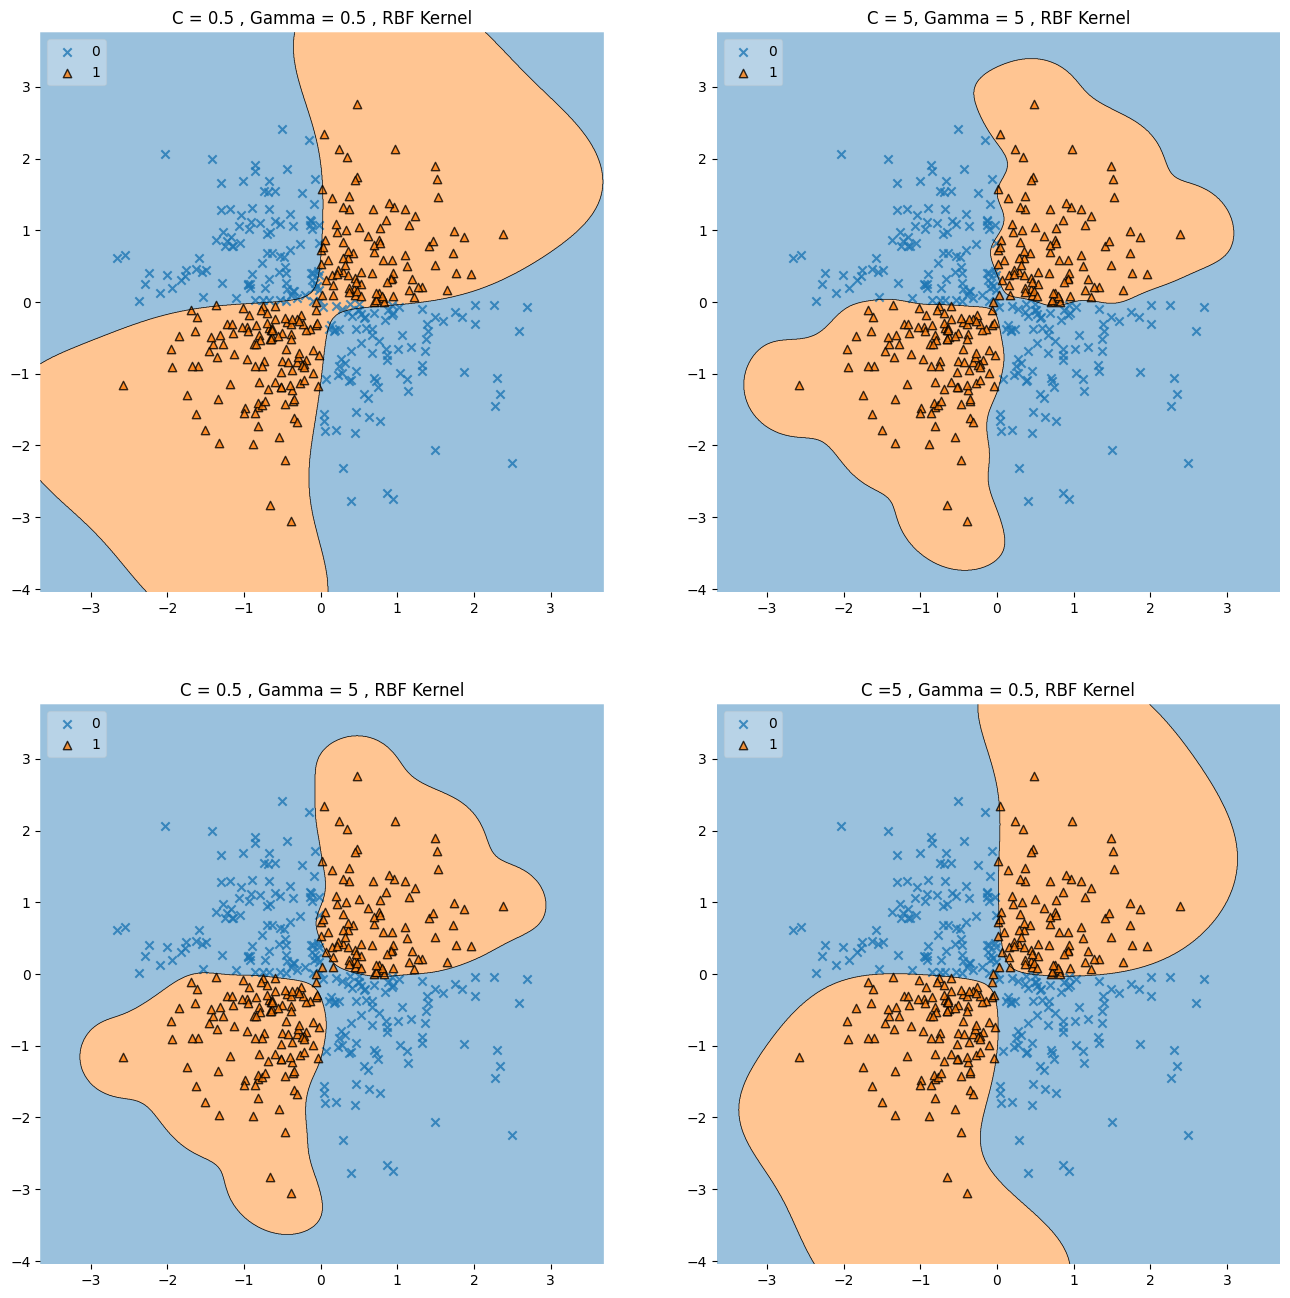

In [ ]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))

clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=5, kernel='rbf', gamma = 5)
clf3 = SVC(C=0.5, kernel='rbf', gamma = 5)
clf4 = SVC(C=5, kernel='rbf', gamma = 0.5)
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5 , RBF Kernel' , 'C = 5, Gamma = 5 , RBF Kernel', 'C = 0.5 , Gamma = 5 , RBF Kernel'  ,'C =5 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

- Smaller gamma value makes the bell shaped curve wider
- Instances have a larger range of influence
- The decision boundary ends up smoother.

# **Practice**:

In a new Notebook, utilize the Iris dataset and apply Support Vector Machine (SVM) classifiers with polynomial and radial basis function (RBF) kernels using various parameter values.